In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_dots(mu, sigama):
    num_points = 70
    return np.random.multivariate_normal(mu, sigama, num_points)

dotsdict = dict()
dotsdict['1'] = generate_dots(np.array([-1, -1]), np.array([[1, 0.5], [0.5, 1]]))
dotsdict['2'] = generate_dots(np.array([6, 2]), np.array([[1, 0], [0, 1]]))
dotsdict['3'] = generate_dots(np.array([0.5, 7]), np.array([[1, -0.5], [-0.5, 1]]))

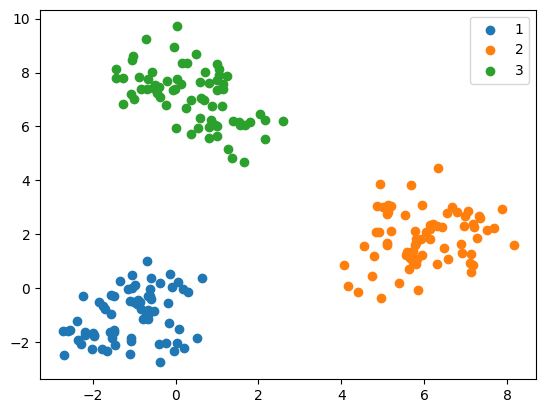

In [3]:
for k, v in dotsdict.items():
    plt.scatter(v[:, 0], v[:, 1], label=k)
plt.legend()
plt.show()

In [4]:
dotsall = np.vstack((dotsdict['1'], dotsdict['2'], dotsdict['3']))
print("总共的随机点个数" ,dotsall.shape)

总共的随机点个数 (210, 2)


In [5]:
from random import random
import random

In [6]:
class KMeans():
    eps = 1e-6
    def __init__(self, k, dots):
        self.k = k
        self.dots = dots
        self.kcenterdict = dict()
        self.kdots = dict()
        self.state = random.getstate()
        self.__initrandomcenter()
        self.__initkdots()
        self.changed = True
        self.internum = 0
        
    
    def __initrandomcenter(self):
        random.setstate(self.state)
        temp = random.sample(range(0, len(self.dots)), self.k)
        for i in range(self.k):
            self.kcenterdict[i] = self.dots[temp[i]]
        print("初始随机中心点\n", self.kcenterdict)
        
    def __initkdots(self):
        for i in range(self.k):
            self.kdots[i] = []
            
    def fit(self):
        while self.changed:
            print("迭代次数", self.internum)
            print(self.kcenterdict)
            self.__initkdots()
            for dot in self.dots:
                nearest = self.__getnearest(dot)
                self.kdots[nearest].append(dot)
            self.__updatecenter()
            self.internum += 1
        return self.kdots, self.kcenterdict
    
    def __updatecenter(self):
        for i in range(self.k):
            newx = sum([x for x, _ in self.kdots[i]]) / len(self.kdots[i])
            newy = sum([y for _, y in self.kdots[i]]) / len(self.kdots[i])
            if(abs(newx - self.kcenterdict[i][0]) < self.eps and abs(newy - self.kcenterdict[i][1]) < self.eps):
                self.changed = False
            else:
                self.changed = True
                self.kcenterdict[i] = (newx, newy)

    def __getnearest(self, dot):
        mindis = float('inf') 
        index = None
        for i in range(self.k):
            x1, y1 = dot
            x2, y2 = self.kcenterdict[i]
            dis = ((x1 - x2) ** 2 + (y1 - y2) ** 2)**0.5
            if dis < mindis:
                mindis = dis
                index = i
        if index is None:
            raise ValueError("index is None")
        return index
    

In [7]:
def cal_adtcc(res, kcenter):
    """"
    计算每个样本点到聚类中心的距离
    Args:
        res (_type_): _description_
        kcenter (_type_): _description_
    """
    dis = 0
    cnt = 0
    for k, v in res.items():
        center_x = kcenter[k][0]
        center_y = kcenter[k][1]
        for dot in v:
            cnt += 1
            x, y = dot[0], dot[1]
            dis += ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5
    return dis / cnt
            

In [8]:
def draw(res, kcenter, k, ax):
    ax.set_title(f'k={k}')
    for c, v in res.items():
        ax.scatter([x for x, _ in v], [y for _, y in v], label=c)
        ax.scatter(kcenter[c][0], kcenter[c][1], label=f'center of cluster {c}')
    ax.legend()

********** k=1 **********
初始随机中心点
 {0: array([6.88721188, 1.63914828])}
迭代次数 0
{0: array([6.88721188, 1.63914828])}
迭代次数 1
{0: (1.7804894615017182, 2.641697795000635)}
********** k=2 **********
初始随机中心点
 {0: array([4.86972517, 3.05904559]), 1: array([1.68250954, 6.03841358])}
迭代次数 0
{0: array([4.86972517, 3.05904559]), 1: array([1.68250954, 6.03841358])}
迭代次数 1
{0: (2.9690011836798877, 0.513109690646494), 1: (0.032678105357348886, 5.7719744190508395)}
迭代次数 2
{0: (2.469910264396776, 0.41396549670041854), 1: (0.4016478557115993, 7.097162391601065)}
********** k=3 **********
初始随机中心点
 {0: array([-2.24240059, -0.31244418]), 1: array([5.76408775, 1.59150425]), 2: array([-0.79270397, -1.14645861])}
迭代次数 0
{0: array([-2.24240059, -0.31244418]), 1: array([5.76408775, 1.59150425]), 2: array([-0.79270397, -1.14645861])}
迭代次数 1
{0: (-1.1200818001150874, 4.147122157438044), 1: (4.115328671751477, 3.7677090361764467), 2: (-0.7831859997572573, -1.1079823312022516)}
迭代次数 2
{0: (0.22318430629283445, 7.2

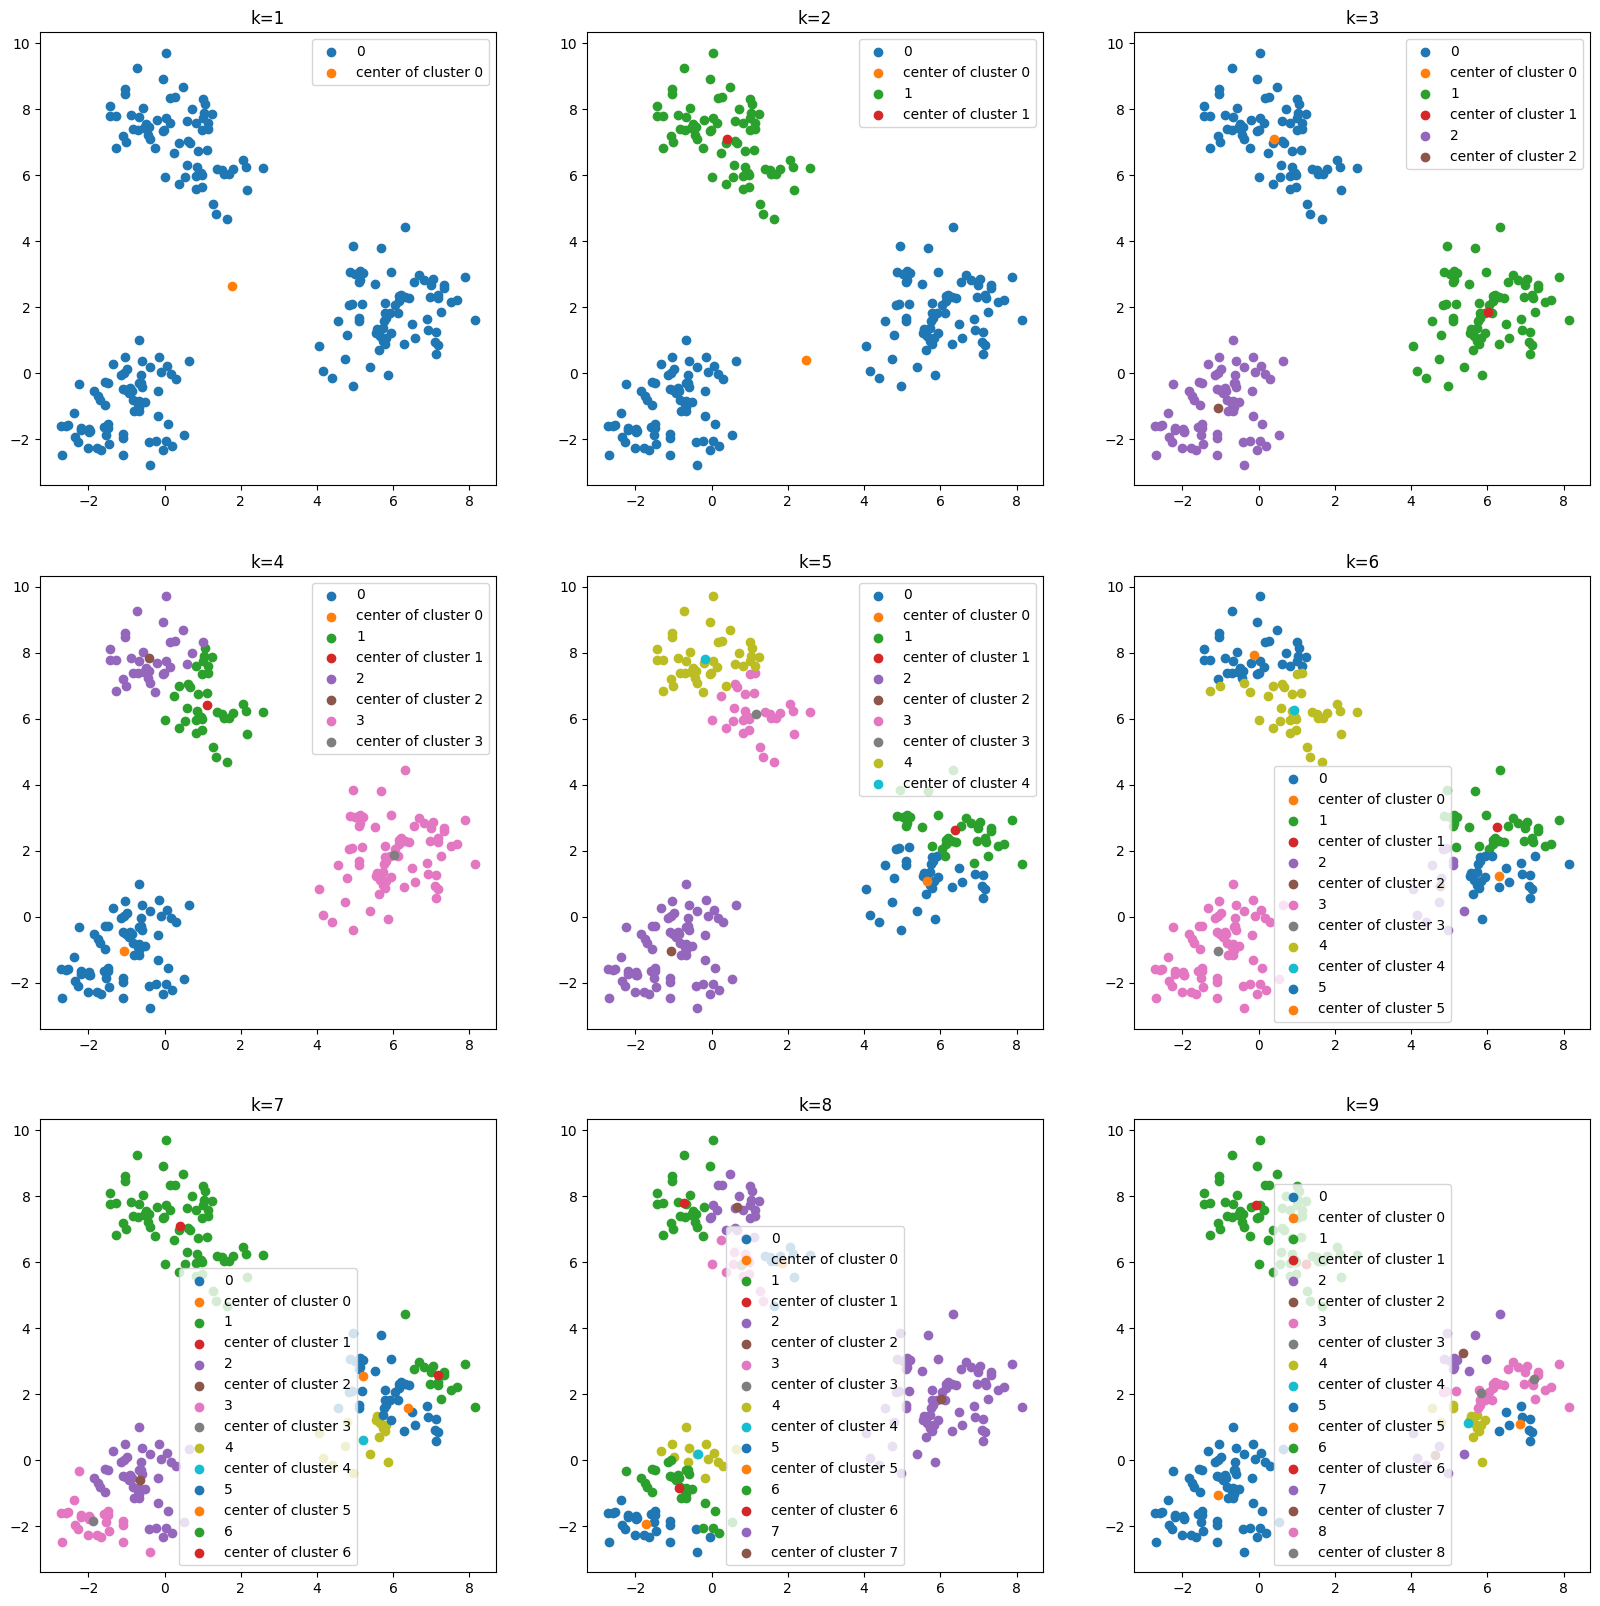

Text(0, 0.5, 'Avg Distance to Cluster Center')

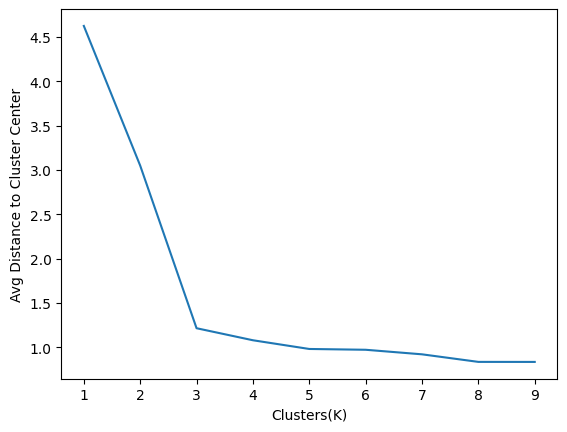

In [9]:
kbegin = 1
kend = 9
adtcc = []
plt.figure(figsize=(20,20))
for k in range(kbegin, kend+1):
    print('*'*10, f'k={k}','*'*10)
    kmeans = KMeans(k, dotsall)
    res, kcenter = kmeans.fit()
    adtcc.append(cal_adtcc(res, kcenter))
    ax = plt.subplot(3,3,k)
    draw(res, kcenter, k, ax)
plt.show()
plt.plot(range(kbegin, kend + 1), adtcc)
plt.xlabel("Clusters(K)")
plt.ylabel("Avg Distance to Cluster Center")

## 结论
- 采取类内距离准则作为衡量标准，即y轴代表类内距离
- 由图像，在K=3之前，类内距离随着K增大迅速减小；当在K=3之后，类内距离随着K的增大缓慢减小。
- 由有效性检验相关知识，合理聚类数K=3